Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [2]:
#! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 2.5 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from collections import Counter
from PIL import Image
import glob

import warnings

# Filter specific warning type
warnings.filterwarnings("ignore")

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Update the paths of the train and test dataset
base_dir = "Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(f"{base_dir}/Train")
data_dir_test = pathlib.Path(f"{base_dir}/Test")

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode="categorical",
  validation_split = 0.2,
  subset = "training", ## choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode="categorical",
  validation_split = 0.2,
  subset = "validation", ## choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### create a code to visualize one instance of all the nine classes present in the dataset

In [12]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

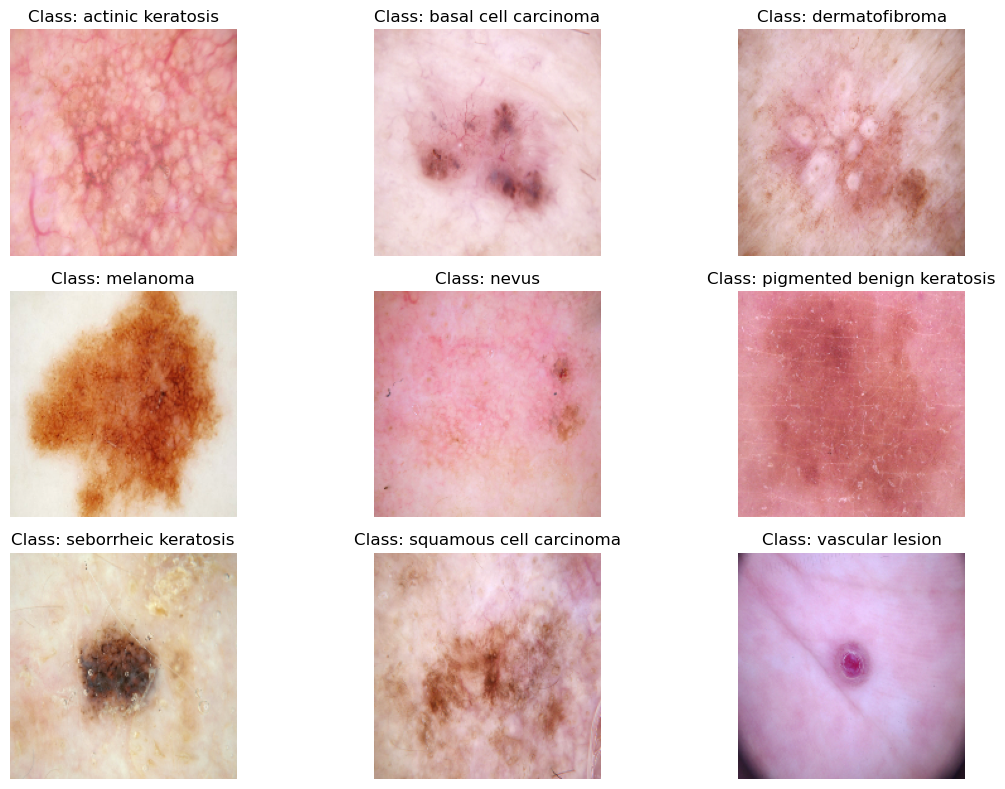

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize



def extract_one_instance_per_class(dataset):
    """
    Extracts one instance per class from the given dataset.

    Parameters:
        dataset (tf.data.Dataset): The input dataset.

    Returns:
        dict: A dictionary containing one instance per class, with class names as keys.
    """
    class_names = dataset.class_names
    one_instance_per_class = {}

    all_classes_present = False

    # Iterate through the dataset to extract one instance for each class
    for images, labels in dataset:
        # Since the batch size is 32 iterate over each 32 images
        for image, label in zip(images, labels):
            class_number = np.argmax(label.numpy())
            # print(class_number)
            class_name = class_names[class_number]

            # If the class instance is not already extracted, add it to the dictionary
            if class_name not in one_instance_per_class:
                one_instance_per_class[class_name] = image.numpy()

                # Check if instances for all classes are present
                if len(class_names) == len(one_instance_per_class):
                    all_classes_present = True
                    break
        if all_classes_present:
            break

    return one_instance_per_class

# Example usage:
one_instance_per_class_dict = extract_one_instance_per_class(train_ds)



# Number of columns in the grid
num_columns = 3

# Calculate the number of rows needed based on the number of classes
num_rows = (len(train_ds.class_names) + num_columns - 1) // num_columns

# Create a new figure for the grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each class for visualization
for i, class_name in enumerate(train_ds.class_names):
    ax = axes[i]
    ax.set_title(f"Class: {class_name}")

    # Retrieve the instance and normalize the values to the [0, 1] range
    # imshow function expects float values to be between 0 and 1
    instance = one_instance_per_class_dict[class_name]
    normalized_instance = instance / np.max(instance)

    # Display the normalized instance in the grid
    ax.imshow(normalized_instance)
    ax.axis('off')

# Adjust layout and display the grid
plt.tight_layout()
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset.

Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
num_classes = 9
img_height = 180
img_width = 180
# img_height = 256
# img_width = 256

def get_model(num_classes, img_height, img_width):
    model = models.Sequential()
    model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
    # model.add(layers.Rescaling(1./255))
    model.add(layers.Conv2D(32, (4, 4), padding='same'))
    model.add(layers.Activation('relu'))

    # model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3)))
    model.add(layers.Activation('relu'))

    # model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.Activation('relu'))

    # model.add(layers.BatchNormalization())

    # model.add(layers.Conv2D(128, (3, 3)))
    # model.add(layers.Activation('relu'))

    # model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())

    model.add(layers.Dense(64))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))


    model.add(layers.Dense(num_classes))
    model.add(layers.Activation('softmax'))
    return model



model = get_model(num_classes, img_height, img_width)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 178, 178, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 89, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 89, 89, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 44, 44, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 44, 44, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 247808)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,859,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,954,281 (60.86 MB)

 Trainable params: 15,954,281 (60.86 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
tf.__version__

'2.16.1'

### Train the model

In [41]:
epochs = 50
checkpointfile = "checkpoint.keras"
checkpoint = ModelCheckpoint(checkpointfile, monitor="val_accuracy",
                             save_best_only=True, mode="auto", verbose=1)

earlystopping = EarlyStopping(monitor="val_accuracy",
                          patience=20,
                          mode="auto",
                          verbose=1)

learning_rate_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystopping, learning_rate_control]
)

In [21]:
# save the full model

modelfile = "saved_model/1" # 1 is just the version number(can be used by tensorflow serve later)

tf.saved_model.save(model, modelfile)



INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


In [22]:
# code to load the saved model
loaded = tf.saved_model.load(modelfile)
print(list(loaded.signatures.keys()))

['serving_default']


### Visualizing training results

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings
* Training accuracy is more and validation accuracy is less after 10 epochs experiment
* Model is somewhat overfitting
* Check for imbalance in the dataset

####  Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.

def count_class_images(directory_path):
    class_distribution = Counter()

    # Create the file path pattern to match JPG images
    jpg_pattern = os.path.join(directory_path, "*", "*.jpg")

    # Use glob to get a list of JPG files
    jpg_files = glob.glob(jpg_pattern)
    print(1)
    # Count the number of images in each class
    for jpg_file in jpg_files:
        class_name = os.path.basename(os.path.dirname(jpg_file))
        class_distribution[class_name] += 1

    return pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Image Count']).sort_values(by='Image Count')

count_class_images(data_dir_train)

1


,Class,Image Count
7,seborrheic keratosis,77
8,dermatofibroma,95
4,actinic keratosis,114
6,vascular lesion,139
5,squamous cell carcinoma,181
2,nevus,357
3,basal cell carcinoma,376
0,melanoma,438
1,pigmented benign keratosis,462


In [25]:
os.listdir(data_dir_train)

['melanoma',
 'pigmented benign keratosis',
 'nevus',
 'basal cell carcinoma',
 'actinic keratosis',
 'squamous cell carcinoma',
 'vascular lesion',
 'seborrheic keratosis',
 'dermatofibroma']

* There is an imbalance in the dataset as given in the above dataframe


####  Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
#
try:
  import Augmentor
except ModuleNotFoundError:
  !pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
augmented_dir = "data_augmented" # this data is same as the original data since augmentation is only in training data

#augmentation_done = False
# augmentation is already done, so need not be done again and again

if not augmentation_done:
    path_to_training_dataset = pathlib.Path(f"{base_dir}/Train")
    print(path_to_training_dataset)
    import Augmentor
    for i in class_names:
        p = Augmentor.Pipeline(path_to_training_dataset / i)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x287E306D0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2F804D050>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x2CFBC55D0>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2CB13E950>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x286431F10>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2F7E0DE10>: 100%|█|


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

* Augmentation was done locally and was uploaded to google colab to avoid using colab for operations that can be done locally
* Augmentation part is not executed because it should be only done once

In [34]:



data_dir_train = pathlib.Path(f"{base_dir}/Train")
data_dir_test = pathlib.Path(f"{base_dir}/Test")

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

# new_df = original_df.append(df2)

In [39]:
df2['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

* There is enough data in each class now

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

####  Create a training dataset

In [35]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode="categorical",
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


####  Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode="categorical",
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


####  Create your model (make sure to include normalization)

In [37]:
## your code goes here

num_classes = 9
img_height = 180
img_width = 180
# img_height = 256
# img_width = 256

### Your code goes here

model = get_model(num_classes, img_height, img_width)

####  Compile your model (Choose optimizer and loss function appropriately)

In [40]:
## your code goes here

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

####   Train your model

In [44]:
# epochs = 30
## Your code goes here, use 50 epochs.
# history = # your model fit code

checkpointfile_augmented = "checkpoint_augmented.keras"
checkpoint = ModelCheckpoint(checkpointfile_augmented, monitor="val_accuracy",
                             save_best_only=True, mode="auto", verbose=1)
earlystopping = EarlyStopping(monitor="val_accuracy",
                          patience=20,
                          mode="auto",
                          verbose=1)

learning_rate_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystopping, learning_rate_control]
)

In [42]:
modelfile = "saved_model/2" # 2 is just the version number(can be used by tensorflow serve later)

tf.saved_model.save(model, modelfile)

INFO:tensorflow:Assets written to: saved_model/2/assets


INFO:tensorflow:Assets written to: saved_model/2/assets


####   Visualize the model results

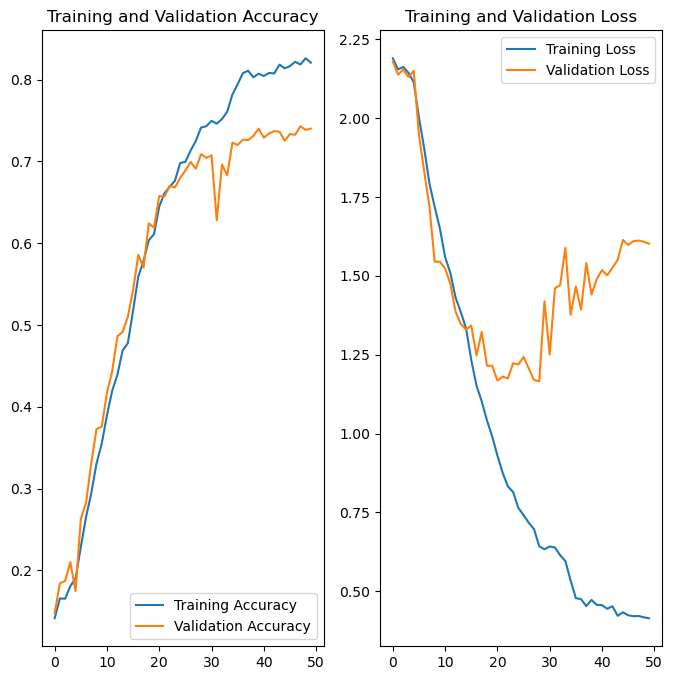

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Conclusions
* Model accuracy improved.
* Training was done in colab using local runtime.(Improvement can be done by training using gpu in the cloud)
* Training accuracy 82%, validation accuracy 74%
* More training can improve the validation accuracy of the model.
* Right now only 500 augmented images are created per class, more augmented images can improve the accuracy further.

